In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [223]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/HCLTECH.csv")

In [224]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [225]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [226]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5.300000e+03,5.300000e+03,2456.000000,4.797000e+03,4797.000000
mean,642.113802,643.018887,654.269217,630.466274,642.240547,642.173981,642.502587,1.645121e+06,1.075213e+14,65378.973941,8.142533e+05,0.504206
std,411.660337,413.208429,420.237830,404.336086,411.739377,411.674568,412.001186,2.187826e+06,1.718074e+14,47842.804142,9.392883e+05,0.177111
min,89.700000,87.100000,94.750000,86.650000,89.000000,89.700000,91.440000,8.500000e+02,5.092228e+10,482.000000,3.095000e+03,0.045600
25%,314.200000,315.825000,322.725000,308.050000,314.462500,314.200000,315.047500,5.917092e+05,2.166692e+13,35885.750000,2.671450e+05,0.380000
50%,535.075000,533.250000,545.000000,520.250000,535.150000,535.075000,533.600000,1.036871e+06,4.816815e+13,55244.500000,5.379440e+05,0.528600
75%,893.975000,893.425000,907.837500,882.487500,895.425000,894.387500,895.102500,1.775460e+06,1.313830e+14,81039.000000,9.818800e+05,0.636100
max,2819.150000,2825.000000,2998.000000,2760.500000,2805.000000,2819.150000,2883.950000,3.231253e+07,2.532038e+15,465056.000000,1.973903e+07,1.000000


In [227]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [228]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [229]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [230]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [231]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [232]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [233]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5295,3.407183,-1.191489,928.80,19619972,NaN
5296,1.640676,-0.230934,928.85,6406825,NaN
5297,1.529699,-0.794674,923.80,6845677,NaN
5298,2.491456,-2.167366,909.55,8588734,NaN
5299,2.188966,-0.668508,898.95,10921664,NaN


In [234]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [235]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [236]:
#Define the prediction model
model = RandomForestRegressor()

In [237]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [238]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9457530611789565


In [239]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [240]:
predictions = model.predict(X_Check)

In [241]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

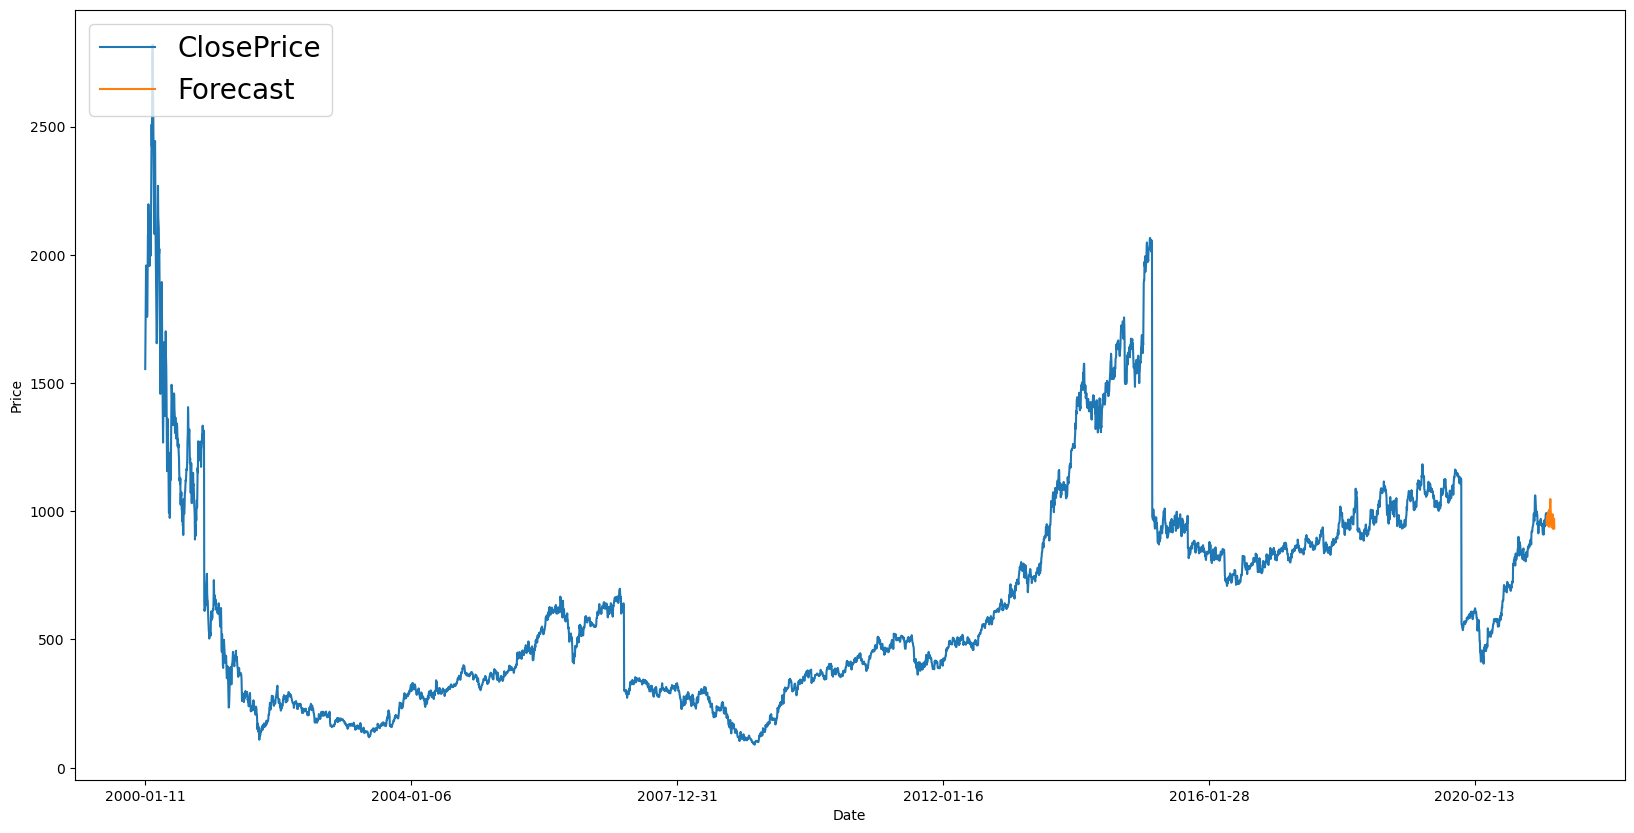

In [242]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')